In [49]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()
plt.rcParams.update({'font.size': 14})

In [50]:
uniqueChain = [[1, 1, 1, 1],
               [-1, -1, -1, -1],
               [1, 1, 1, -1],
               [1, 1, -1, 1],
               [1, -1, 1, 1],
               [1, -1, -1, -1],
               [-1, 1, 1, 1], 
               [-1, 1, -1, -1],
               [-1, -1, 1, -1],
               [-1, -1, -1, 1],
               [1, -1, -1, 1],
               [1, 1,  -1, -1],              
               [1, -1, 1, -1],               
               [-1, 1, 1, -1],
               [-1, 1, -1, 1],               
               [-1, -1, 1, 1],
            ]

In [51]:
chain = []
J = 0.05

In [52]:
for i in np.arange(200):
    data = rng.choice([-1, 1], 4)
    chain.append(data)


In [53]:
def energy(element):
    if np.sum(element) == 0:
        return -2 * J
    elif np.abs(np.sum(element)) == 2:
        return 0
    elif np.abs(np.sum(element)) == 4:
        return 6 * J

In [54]:
def chainEnergy(chain):
    totEnergy = 0
    for element in chain:
        totEnergy += energy(element)
    
    return totEnergy

In [55]:
beta = 0

In [56]:
def prob(epsilon):
    return np.exp(-beta * epsilon) / (np.exp(2 * J * beta) + 1 + np.exp(-6 * J * beta))

In [57]:
def iterate(chain):
    result = np.copy(chain)
    for i , element in enumerate(chain):
        p = []
        altChains = []
        for altElement in uniqueChain:
            if np.abs(np.abs(np.sum(element)) - np.abs(np.sum(altElement))) or np.sum(1 * (altElement == element)) == 4:
                altChain = np.copy(result)
                altChain[i-1][-1] = altElement[0]
                altChain[(i+1) % len(result)][0] = altElement[-1]
                altChain[i] = altElement
                p.append(np.exp(-beta*(chainEnergy(altChain) - chainEnergy(result))))
                altChains.append(altChain)
        p /= sum(p)
        result = rng.choice(altChains, p = p)
    result[0][0] = result[-1][-1]
    return result

In [58]:
def evolve(chain, steps = 10):

    elementEnergies = []
    chainEnergies = []
    firstElement = []
    i = 0
    while i < steps:
        i += 1
        chain = np.copy(iterate(chain))
        elementEnergies.append(energy(chain[0]))
        chainEnergies.append(chainEnergy(chain))
        firstElement.append(np.append(chain[0], np.sum(chain[0])))
    return chain, elementEnergies, chainEnergies, firstElement

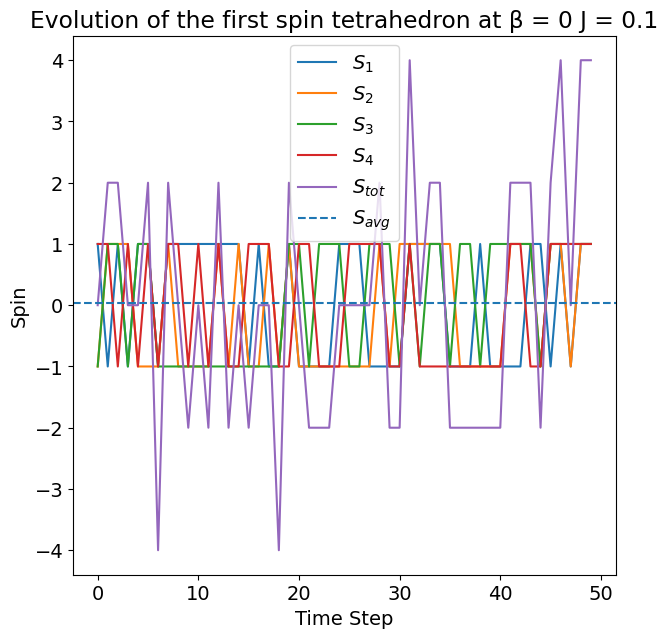

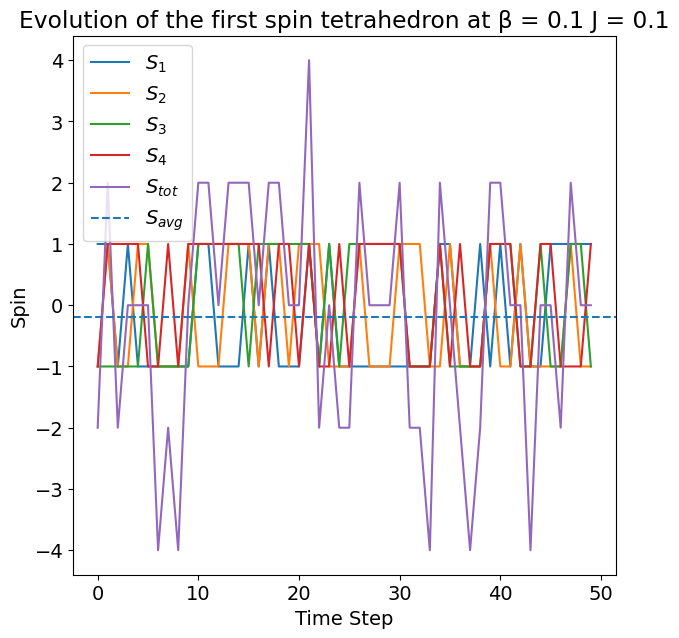

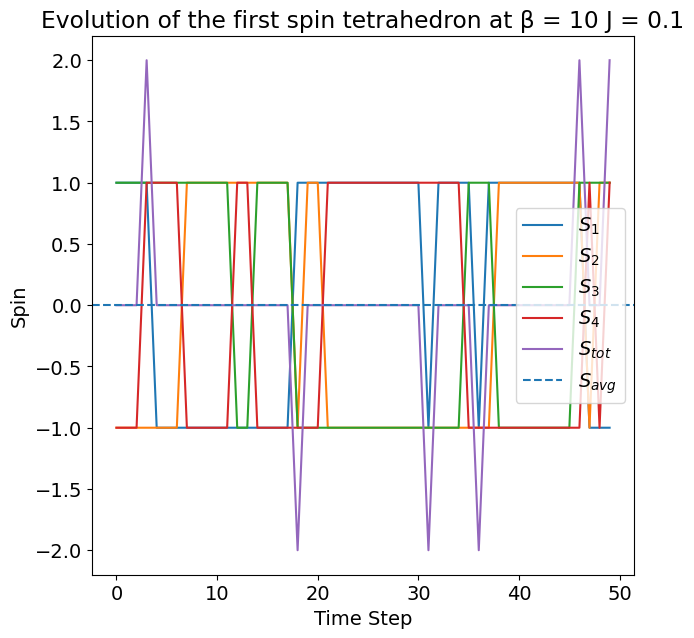

In [59]:
J = 0.1

for beta in [0, 0.1, 10, 100]:
        testChain = np.copy(chain)
        testChain , elementEnergies, chainEnergies, firstElement = evolve(testChain, 50)
        plt.figure(figsize = (7,7))
        plt.plot(firstElement, label = [r'$S_1$', r'$S_2$', r'$S_3$', r'$S_4$', r'$S_{tot}$'])
        shape = list(np.array(firstElement).shape)
        shape[1] = 1
        plt.axhline(y=np.average(np.take(firstElement, -1, axis = 1).reshape(tuple(shape))), label = r'$S_{avg}$', linestyle = '--')
        plt.xlabel("Time Step")
        plt.ylabel("Spin")
        plt.title("Evolution of the first spin tetrahedron at β = " + str((beta)) + " J = " +  str(J))
        plt.legend(loc = 'best')
        plt.show()